**Akshat Aggarwal**

**E22CSEU0020**

TASK:-1

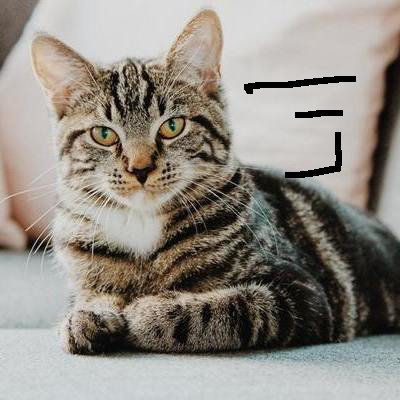

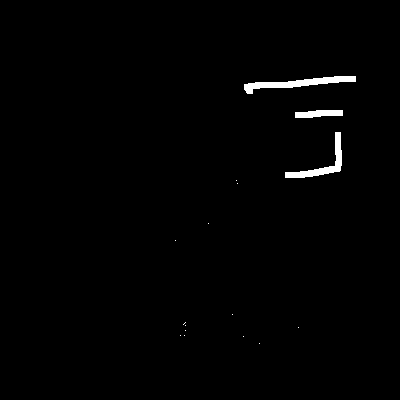

In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# reading the damaged image
image_path = "/content/cat_damaged.png"
image = cv2.imread(image_path)
damaged_img = cv2.imread(filename=r"/content/cat_damaged.png")

# get the shape of the image
height, width = damaged_img.shape[0], damaged_img.shape[1]

# Converting all pixels greater than zero to black while black becomes white
for i in range(height):
	for j in range(width):
		if damaged_img[i, j].sum() > 0:
			damaged_img[i, j] = 0
		else:
			damaged_img[i, j] = [255, 255, 255]

# saving the mask
mask = damaged_img
cv2.imwrite('mask.jpg', mask)

# displaying mask
cv2_imshow(image)
cv2_imshow(mask)


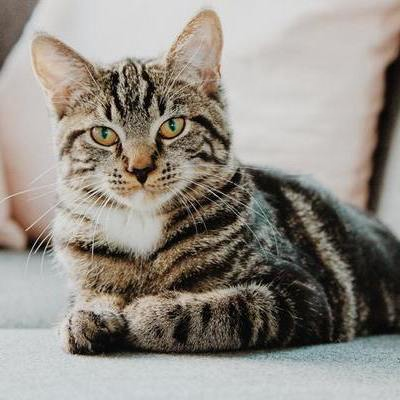

In [2]:
import numpy as np
import cv2

# Open the image.
img = cv2.imread('/content/cat_damaged.png')

# Load the mask - Changed filename to match the saved mask from the previous cell
mask = cv2.imread('mask.jpg', 0)

# Inpaint.
dst = cv2.inpaint(img, mask, 3, cv2.INPAINT_NS)

# Write the output.
cv2.imwrite('cat_inpainted.png', dst)
cv2_imshow(dst)

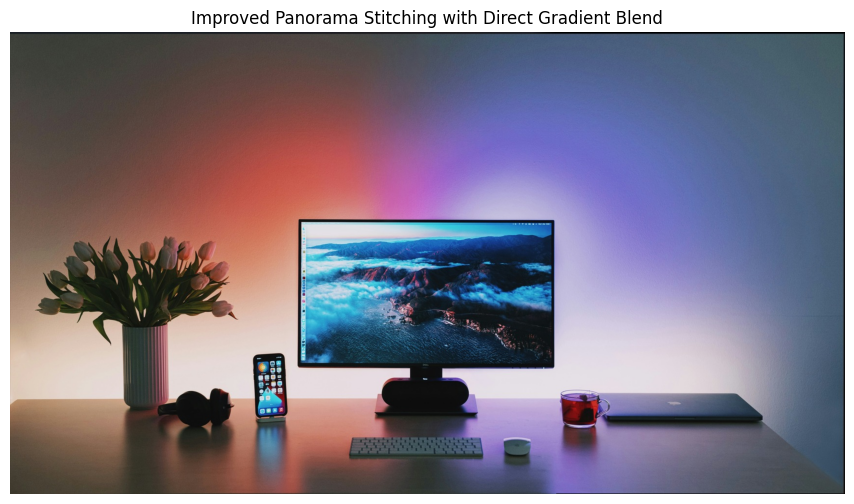

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def create_blending_mask(img1, img2, overlap_width):
    """Creates a gradient mask for blending."""
    mask1 = np.zeros((max(img1.shape[0], img2.shape[0]), img1.shape[1]), dtype=np.float32)
    mask2 = np.zeros((max(img1.shape[0], img2.shape[0]), img2.shape[1]), dtype=np.float32)

    mask1[:, :-overlap_width] = 1.0
    mask1[:, -overlap_width:] = np.linspace(1.0, 0.0, overlap_width)

    mask2[:, :overlap_width] = np.linspace(0.0, 1.0, overlap_width)
    mask2[:, overlap_width:] = 1.0

    return mask1, mask2

img1 = cv2.imread('/content/left10.jpg')
img2 = cv2.imread('/content/right10.jpg')

if img1 is None or img2 is None:
    raise FileNotFoundError("Could not load one or both of the images. Make sure 'Left.png' and 'Right.png' are in the correct directory.")

gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray2, None)

FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=100)

flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1, des2, k=2)

good_matches = []
for m, n in matches:
    if m.distance < 0.6 * n.distance:
        good_matches.append(m)

if len(good_matches) < 10:
    raise Exception("Not enough good matches found. Panorama stitching might fail.")

src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

H, mask = cv2.findHomography(dst_pts, src_pts, cv2.RANSAC, 5.0, confidence=0.99)

if H is None:
    raise Exception("Homography could not be computed. Check feature matching.")

height = max(img1.shape[0], img2.shape[0])
width = img1.shape[1] + img2.shape[1]
warped_img2 = cv2.warpPerspective(img2, H, (width, height))
stitched_img = np.zeros((height, width, 3), dtype=np.uint8)
stitched_img[:img1.shape[0], :img1.shape[1]] = img1

overlap_width = 50
blend_start = img1.shape[1] - overlap_width
blend_end = img1.shape[1]

blend_mask = np.linspace(1, 0, overlap_width).reshape(1, overlap_width, 1)

roi1 = stitched_img[:img1.shape[0], blend_start:blend_end].astype(np.float32)
roi2 = warped_img2[:img1.shape[0], blend_start:blend_end].astype(np.float32)

blended_roi = (roi1 * blend_mask + roi2 * (1 - blend_mask)).astype(np.uint8)

stitched_img[:img1.shape[0], blend_start:blend_end] = blended_roi

stitched_img[:img2.shape[0], img1.shape[1]:] = warped_img2[:img2.shape[0], img1.shape[1]:]

gray_stitched = cv2.cvtColor(stitched_img, cv2.COLOR_BGR2GRAY)
_, thresh_stitched = cv2.threshold(gray_stitched, 1, 255, cv2.THRESH_BINARY)
contours_stitched, _ = cv2.findContours(thresh_stitched, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
if contours_stitched:
    x, y, w, h = cv2.boundingRect(contours_stitched[0])
    final_result = stitched_img[y:y+h, x:x+w]
else:
    final_result = stitched_img

plt.figure(figsize=(12, 6))
plt.imshow(cv2.cvtColor(final_result, cv2.COLOR_BGR2RGB))
plt.title("Improved Panorama Stitching with Direct Gradient Blend")
plt.axis('off')
plt.show()

<h4>Task 2</h4>

Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - loss: 0.1181 - val_loss: 0.1140
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1122 - val_loss: 0.1140
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1119 - val_loss: 0.1140
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.1118 - val_loss: 0.1140
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 8/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1119 - val_loss: 0.1140
Epoch 9/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 10/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1118 - val_loss: 0.1140
Epoch 11/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 12/100
469/469 ━━━━━━━━━━━━━━━━━━

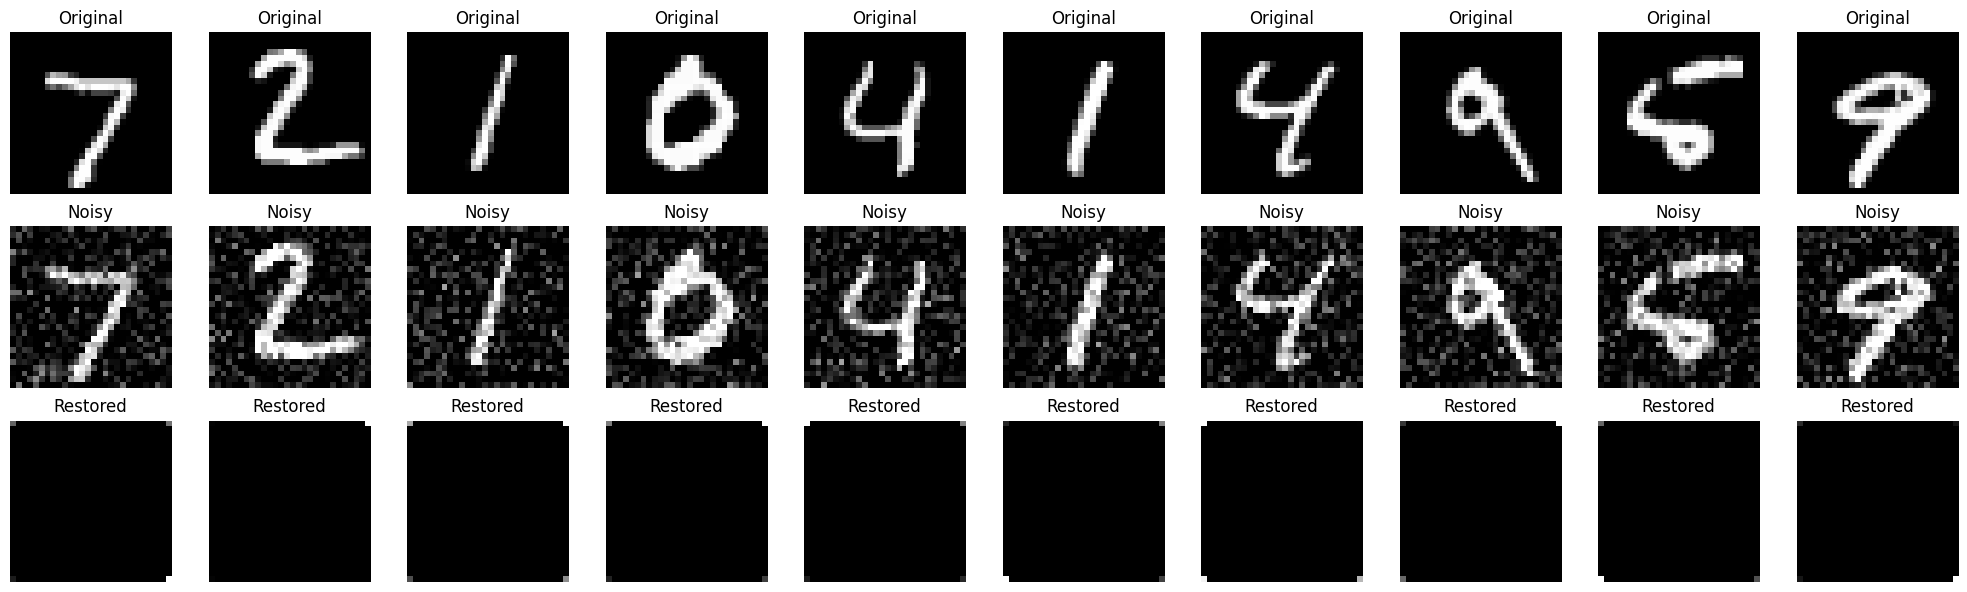

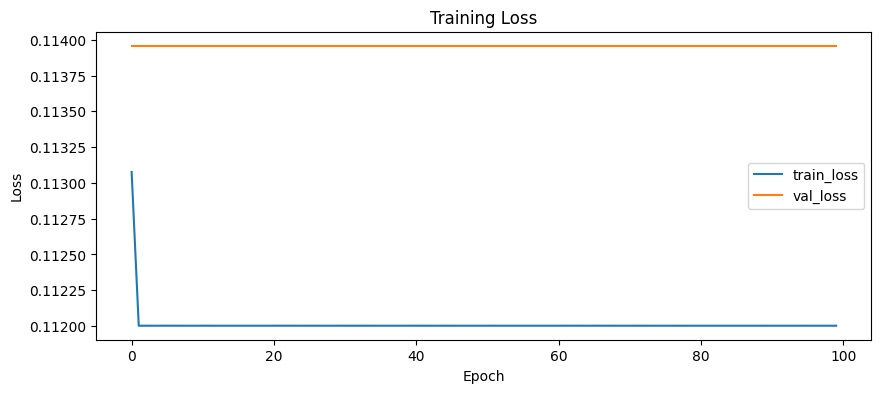

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from skimage.metrics import peak_signal_noise_ratio as psnr


(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255.

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

def add_noise(images, noise_factor=0.2):
    noisy = images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=images.shape)
    noisy = np.clip(noisy, 0., 1.)
    return noisy

noisy_train = add_noise(x_train)
noisy_test = add_noise(x_test)

def build_autoencoder():
    input_img = layers.Input(shape=(28, 28, 1))

    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    return models.Model(input_img, decoded)

autoencoder = build_autoencoder()
autoencoder.compile(optimizer='adam', loss='mse')

history = autoencoder.fit(noisy_train, x_train,
                          epochs=100,
                          batch_size=128,
                          shuffle=True,
                          validation_data=(noisy_test, x_test))

preds = autoencoder.predict(noisy_test)

scores = [psnr(x_test[i], preds[i], data_range=1.0) for i in range(100)]
print("Average PSNR on 100 samples:", np.mean(scores))

n = 10
plt.figure(figsize=(20, 6))
for i in range(n):

    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.title("Original")
    plt.axis("off")

    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(noisy_test[i].reshape(28, 28), cmap="gray")
    plt.title("Noisy")
    plt.axis("off")

    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(preds[i].reshape(28, 28), cmap="gray")
    plt.title("Restored")
    plt.axis("off")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [23]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [24]:
device= torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [25]:
transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5,0.5,0.5], [0.5,0.5,0.5]),
    transforms.Lambda(lambda x: x.to(device))

])

In [26]:
train_dataset = datasets.CIFAR10(root='CIFAR/', train=True, transform=transforms, download=True)
test_dataset = datasets.CIFAR10(root='CIFAR/', train=False, transform=transforms, download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

100%|██████████| 170M/170M [00:13<00:00, 12.6MB/s]


In [27]:
class ConvAutoEncoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 32, 3, stride=3, padding=1), nn.ReLU(True),
            # for input shape (2,1,28,28)
            # output is (2,32,10,10)
            nn.MaxPool2d(2, stride=2),
            # output is (2,32,5,5)
            nn.Conv2d(32, 64, 3, stride=2, padding=1), nn.ReLU(True),
            #outpur is (2,64,3,3)
            nn.MaxPool2d(2, stride=1)
            #output is (2,64,2,2)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, 3, stride=2), nn.ReLU(True),
            #output is (2,32,5,5)
            nn.ConvTranspose2d(32, 16, 5, stride=3, padding=1), nn.ReLU(True),
            # output is (2,16,15,15)
            nn.ConvTranspose2d(16, 1, 2, stride=2, padding=1), nn.Tanh()
            # output is (2,1,28,28)
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        print(x.shape)
        return x

In [28]:
class AEModel(nn.Module):
    def __init__(self, cin, cout, stride=1, groups=1):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(cin, 64, 3, stride=3, padding=1), nn.ReLU(True),
            nn.MaxPool2d(2, stride=2),
            nn.Conv2d(64, cout, 3, stride=2, padding=1), nn.ReLU(True),
            nn.MaxPool2d(2, stride=1)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(cout, 64, 3, stride=2), nn.ReLU(True),
            nn.ConvTranspose2d(64, 32, 5, stride=3, padding=1), nn.ReLU(True),
            nn.ConvTranspose2d(32, cin, 4, stride=2), nn.Tanh()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [29]:
model_test = AEModel(3,128)
model_test(torch.rand(2,3,32,32)).shape

torch.Size([2, 3, 32, 32])

In [30]:
def train (model,train_loader,loss,opt,device):
    model.train()
    loss_history=[]
    for true_image,_ in train_loader:
        opt.zero_grad()
        true_image=true_image.to(device)
        generated_image=model(true_image)
        lss=loss(generated_image,true_image)
        lss.backward()
        opt.step()
        loss_history.append(lss.item())
    return np.mean(loss_history)

In [31]:
def val (model,test_loader,loss,device):
    model.eval()
    loss_history=[]
    with torch.no_grad():
        for val_image,_ in test_loader:
            true_image=val_image.to(device)
            generated_image=model(true_image)
            lss=loss(generated_image,true_image)
            loss_history.append(lss.item())
    return np.mean(loss_history)


In [32]:
model = AEModel(3,128).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-5)

In [33]:
num_epochs = 20
trainl=[]
testl=[]
for epoch in range(num_epochs):
    train_loss = train(model,train_loader, criterion, optimizer,device)
    loss = val( model,test_loader, criterion,device)
    trainl.append(train_loss)
    testl.append(loss)
    print(f'epoic {epoch+1}   ||  training loss is {train_loss} ||   val loss is {loss}')

epoic 1   ||  training loss is 0.07514488623213128 ||   val loss is 0.05536874400297548
epoic 2   ||  training loss is 0.052339021221298694 ||   val loss is 0.05008339260224324
epoic 3   ||  training loss is 0.048554237288854 ||   val loss is 0.04779321380007039
epoic 4   ||  training loss is 0.04673745212576273 ||   val loss is 0.04640595479660733
epoic 5   ||  training loss is 0.04541442344141433 ||   val loss is 0.045351417035244077
epoic 6   ||  training loss is 0.044474614536404 ||   val loss is 0.04421206127116634
epoic 7   ||  training loss is 0.04349359981906231 ||   val loss is 0.04317833836765805
epoic 8   ||  training loss is 0.0427611078495336 ||   val loss is 0.04308077809252557
epoic 9   ||  training loss is 0.04209732733990835 ||   val loss is 0.04203318356043974
epoic 10   ||  training loss is 0.0414309791286888 ||   val loss is 0.04131438395684692
epoic 11   ||  training loss is 0.04094524099431989 ||   val loss is 0.04093629672269153
epoic 12   ||  training loss is 0.

<ipython-input-34-b01227acaacf>:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, trainl, 'b', color='red',label='Training loss')


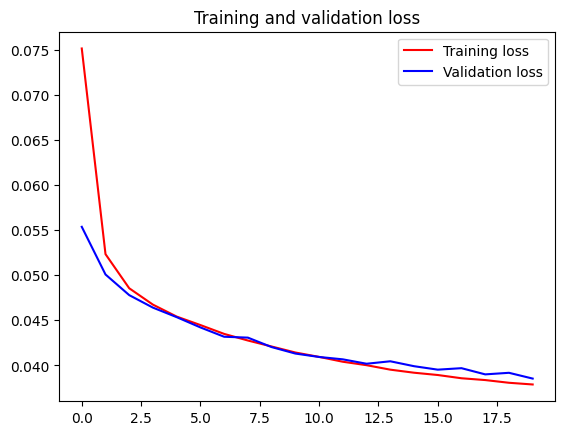

In [34]:
plt.figure()
epochs=[epoch for epoch in range (num_epochs)]
plt.plot(epochs, trainl, 'b', color='red',label='Training loss')
plt.plot(epochs, testl, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [35]:
def show(img, ax=None, title=None):
    """Utility function to display an image"""
    if ax is None:
        ax = plt.gca()
    img = img.cpu().detach().numpy()
    if img.shape[0] == 1:  # Grayscale image
        img = img[0]
        ax.imshow(img, cmap='gray')
    else:  # RGB image
        img = img.transpose((1, 2, 0))  # Convert to HWC format
        ax.imshow(img)
    if title is not None:
        ax.set_title(title)
    ax.axis('off')

In [ ]:
for _ in range(10):
    ix = np.random.randint(len(test_dataset))
    im, _ = test_dataset[ix]
    _im = model(im.unsqueeze(0).to(device))[0]
    fig, ax = plt.subplots(1, 2, figsize=(6, 3))
    show(im, ax=ax[0], title='Input')
    show(_im, ax=ax[1], title='Prediction')
    plt.tight_layout()
    plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
    transforms.Lambda(lambda x: x.to(device))
])

train_dataset = datasets.MNIST(root='MNIST/', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='MNIST/', train=False, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

class ConvAutoEncoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 32, 3, stride=1, padding=1), nn.ReLU(True),  # Keep output 28x28
            nn.MaxPool2d(2, stride=2),  # Output size: (batch, 32, 14, 14)
            nn.Conv2d(32, 64, 3, stride=1, padding=1), nn.ReLU(True),  # Output size: (batch, 64, 14, 14)
            nn.MaxPool2d(2, stride=2)  # Output size: (batch, 64, 7, 7)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, 3, stride=2, padding=1, output_padding=1), nn.ReLU(True),  # Output size: (batch, 32, 14, 14)
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1), nn.ReLU(True),  # Output size: (batch, 16, 28, 28)
            nn.ConvTranspose2d(16, 1, 3, stride=1, padding=1), nn.Tanh()  # Output size: (batch, 1, 28, 28)
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

model = ConvAutoEncoder().to(device)  # Use ConvAutoEncoder for MNIST (grayscale)
criterion = nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-5)

def train(model, train_loader, loss, opt, device):
    model.train()
    loss_history = []
    for true_image, _ in train_loader:
        opt.zero_grad()
        true_image = true_image.to(device)
        generated_image = model(true_image)
        lss = loss(generated_image, true_image)
        lss.backward()
        opt.step()
        loss_history.append(lss.item())
    return np.mean(loss_history)

def val(model, test_loader, loss, device):
    model.eval()
    loss_history = []
    with torch.no_grad():
        for val_image, _ in test_loader:
            true_image = val_image.to(device)
            generated_image = model(true_image)
            lss = loss(generated_image, true_image)
            loss_history.append(lss.item())
    return np.mean(loss_history)

num_epochs = 20
trainl = []
testl = []

for epoch in range(num_epochs):
    train_loss = train(model, train_loader, criterion, optimizer, device)
    loss = val(model, test_loader, criterion, device)
    trainl.append(train_loss)
    testl.append(loss)
    print(f'Epoch {epoch+1}   ||  Training loss: {train_loss} ||   Validation loss: {loss}')

plt.figure()
epochs = [epoch for epoch in range(num_epochs)]
plt.plot(epochs, trainl, 'b', color='red', label='Training loss')
plt.plot(epochs, testl, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

def show(img, ax=None, title=None):
    """Utility function to display an image"""
    if ax is None:
        ax = plt.gca()
    img = img.cpu().detach().numpy()
    if img.shape[0] == 1:  # Grayscale image
        img = img[0]
        ax.imshow(img, cmap='gray')
    else:  # RGB image
        img = img.transpose((1, 2, 0))  # Convert to HWC format
        ax.imshow(img)
    if title is not None:
        ax.set_title(title)
    ax.axis('off')

for _ in range(10):
    ix = np.random.randint(len(test_dataset))
    im, _ = test_dataset[ix]
    _im = model(im.unsqueeze(0).to(device))[0]
    fig, ax = plt.subplots(1, 2, figsize=(6, 3))
    show(im, ax=ax[0], title='Input')
    show(_im, ax=ax[1], title='Prediction')
    plt.tight_layout()
    plt.show()


In [38]:
from __future__ import print_function
import os
import random
import torch
import torch.nn as nn
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
import matplotlib.pyplot as plt

cudnn.benchmark = True

manualSeed = random.randint(1, 10000)
print("Random Seed: ", manualSeed)
random.seed(manualSeed)
torch.manual_seed(manualSeed)

os.makedirs("output", exist_ok=True)
os.makedirs("weights", exist_ok=True)

dataset = dset.CIFAR10(
    root="./data", download=True,
    transform=transforms.Compose([
        transforms.Resize(64),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])
)

nc = 3
dataloader = torch.utils.data.DataLoader(dataset, batch_size=128, shuffle=True, num_workers=2)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("Using device:", device)

ngpu = 1
nz = 100
ngf = 64
ndf = 64

def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        m.weight.data.normal_(0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        m.weight.data.normal_(1.0, 0.02)
        m.bias.data.fill_(0)

class Generator(nn.Module):
    def __init__(self, ngpu):
        super(Generator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            nn.ConvTranspose2d(nz, ngf * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True),
            nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),
            nn.ConvTranspose2d(ngf * 4, ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),
            nn.ConvTranspose2d(ngf * 2, ngf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),
            nn.ConvTranspose2d(ngf, nc, 4, 2, 1, bias=False),
            nn.Tanh()
        )

    def forward(self, input):
        return self.main(input)

netG = Generator(ngpu).to(device)
netG.apply(weights_init)
print(netG)

class Discriminator(nn.Module):
    def __init__(self, ngpu):
        super(Discriminator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            nn.Conv2d(nc, ndf, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(ndf, ndf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 2),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(ndf * 2, ndf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 4),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(ndf * 4, ndf * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 8),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(ndf * 8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input).view(-1, 1).squeeze(1)

netD = Discriminator(ngpu).to(device)
netD.apply(weights_init)
print(netD)

criterion = nn.BCELoss()
optimizerD = optim.Adam(netD.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=0.0002, betas=(0.5, 0.999))

fixed_noise = torch.randn(128, nz, 1, 1, device=device)
real_label = 1
fake_label = 0
niter = 25

for epoch in range(niter):
    for i, data in enumerate(dataloader, 0):
        netD.zero_grad()
        real_cpu = data[0].to(device)
        batch_size = real_cpu.size(0)

        label = torch.full((batch_size,), real_label, device=device, dtype=torch.float)

        output = netD(real_cpu)
        errD_real = criterion(output, label)
        errD_real.backward()
        D_x = output.mean().item()

        noise = torch.randn(batch_size, nz, 1, 1, device=device)
        fake = netG(noise)
        label.fill_(fake_label)
        output = netD(fake.detach())
        errD_fake = criterion(output, label)
        errD_fake.backward()
        D_G_z1 = output.mean().item()
        errD = errD_real + errD_fake
        optimizerD.step()

        netG.zero_grad()
        label.fill_(real_label)
        output = netD(fake)
        errG = criterion(output, label)
        errG.backward()
        D_G_z2 = output.mean().item()
        optimizerG.step()


        if i % 50 == 0:
            print('[%d/%d][%d/%d] Loss_D: %.4f Loss_G: %.4f D(x): %.4f D(G(z)): %.4f / %.4f' %
                  (epoch, niter, i, len(dataloader), errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))

        if i % 100 == 0:
            vutils.save_image(real_cpu, 'output/real_samples.png', normalize=True)
            fake = netG(fixed_noise)
            vutils.save_image(fake.detach(), f'output/fake_samples_epoch_{epoch:03d}.png', normalize=True)

    torch.save(netG.state_dict(), f'weights/netG_epoch_{epoch}.pth')
    torch.save(netD.state_dict(), f'weights/netD_epoch_{epoch}.pth')

Random Seed:  2030


100%|██████████| 170M/170M [00:18<00:00, 9.07MB/s]


Using device: cuda
Generator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    

In [ ]:
import os
from IPython.display import Image, display

output_path = "/content/output"

image_files = sorted([f for f in os.listdir(output_path) if f.endswith(('.png', '.jpg', '.jpeg'))])

for img_file in image_files:
    display(Image(filename=os.path.join(output_path, img_file)))


In [40]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [41]:
(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()
train_images = (train_images.astype("float32") - 127.5) / 127.5
train_images = np.expand_dims(train_images, axis=-1)
BUFFER_SIZE = 60000
BATCH_SIZE = 256
dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [42]:
def build_generator():
    model = tf.keras.Sequential([
        layers.Dense(7*7*256, use_bias=False, input_shape=(100,)),
        layers.BatchNormalization(),
        layers.LeakyReLU(),
        layers.Reshape((7, 7, 256)),
        layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(),
        layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(),
        layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh')
    ])
    return model

In [43]:
def build_discriminator():
    model = tf.keras.Sequential([
        layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[28, 28, 1]),
        layers.LeakyReLU(),
        layers.Dropout(0.3),
        layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'),
        layers.LeakyReLU(),
        layers.Dropout(0.3),
        layers.Flatten(),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

In [44]:
def generator_loss(fake_output):
    return tf.keras.losses.BinaryCrossentropy(from_logits=True)(tf.ones_like(fake_output), fake_output)

In [45]:
def discriminator_loss(real_output, fake_output):
    real_loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)(tf.ones_like(real_output), real_output)
    fake_loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)(tf.zeros_like(fake_output), fake_output)
    return real_loss + fake_loss

In [46]:
generator = build_generator()
discriminator = build_discriminator()

generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [47]:
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, 100])
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)
        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)
        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [48]:
def generate_and_show_images(epoch, noise_dim=100):
    noise = tf.random.normal([16, noise_dim])
    generated_images = generator(noise, training=False)
    fig = plt.figure(figsize=(4, 4))
    for i in range(generated_images.shape[0]):
        plt.subplot(4, 4, i + 1)
        plt.imshow(generated_images[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
        plt.axis('off')
    plt.suptitle(f"Epoch {epoch}")
    plt.show()

In [49]:
def train(dataset, epochs, display_interval=10):
    for epoch in range(epochs):
        for image_batch in dataset:
            train_step(image_batch)
        print(f"Epoch {epoch+1} completed")
        if (epoch) % display_interval == 0:
            generate_and_show_images(epoch + 1)

In [ ]:
EPOCHS = 100
train(dataset, EPOCHS, display_interval=1)

In [ ]:
generate_and_show_images('final')

<h4>V2</h4>

In [ ]:

from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d gauravduttakiit/dogs-breed-dataset

In [ ]:
!unzip /content/dogs-breed-dataset.zip

Found 662 images belonging to 5 classes.
Found 162 images belonging to 5 classes.
Found 206 images belonging to 5 classes.
Dog breeds: ['french_bulldog', 'german_shepherd', 'golden_retriever', 'poodle', 'yorkshire_terrier']

📦 Training MobileNet V1...
17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
 8/21 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.2949 - loss: 2.0504

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


13/21 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.3722 - loss: 1.8309

/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:949: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


21/21 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.4733 - loss: 1.5395 - val_accuracy: 0.9444 - val_loss: 0.1987 - learning_rate: 0.0010
Epoch 2/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - accuracy: 0.9197 - loss: 0.2514 - val_accuracy: 0.9444 - val_loss: 0.1133 - learning_rate: 0.0010
Epoch 3/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.9628 - loss: 0.1261 - val_accuracy: 0.9815 - val_loss: 0.0708 - learning_rate: 0.0010
Epoch 4/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.9554 - loss: 0.1202 - val_accuracy: 0.9877 - val_loss: 0.0544 - learning_rate: 0.0010
Epoch 5/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.9508 - loss: 0.1395 - val_accuracy: 0.9815 - val_loss: 0.0556 - learning_rate: 0.0010
Epoch 6/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.9600 - loss: 0.0984 - val_accuracy: 0.9753 - val_loss: 0.0821 - learning_rate: 0.0010
Epoch 7/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.9727 - loss: 0.0998 - val_accuracy: 0.9815 - va

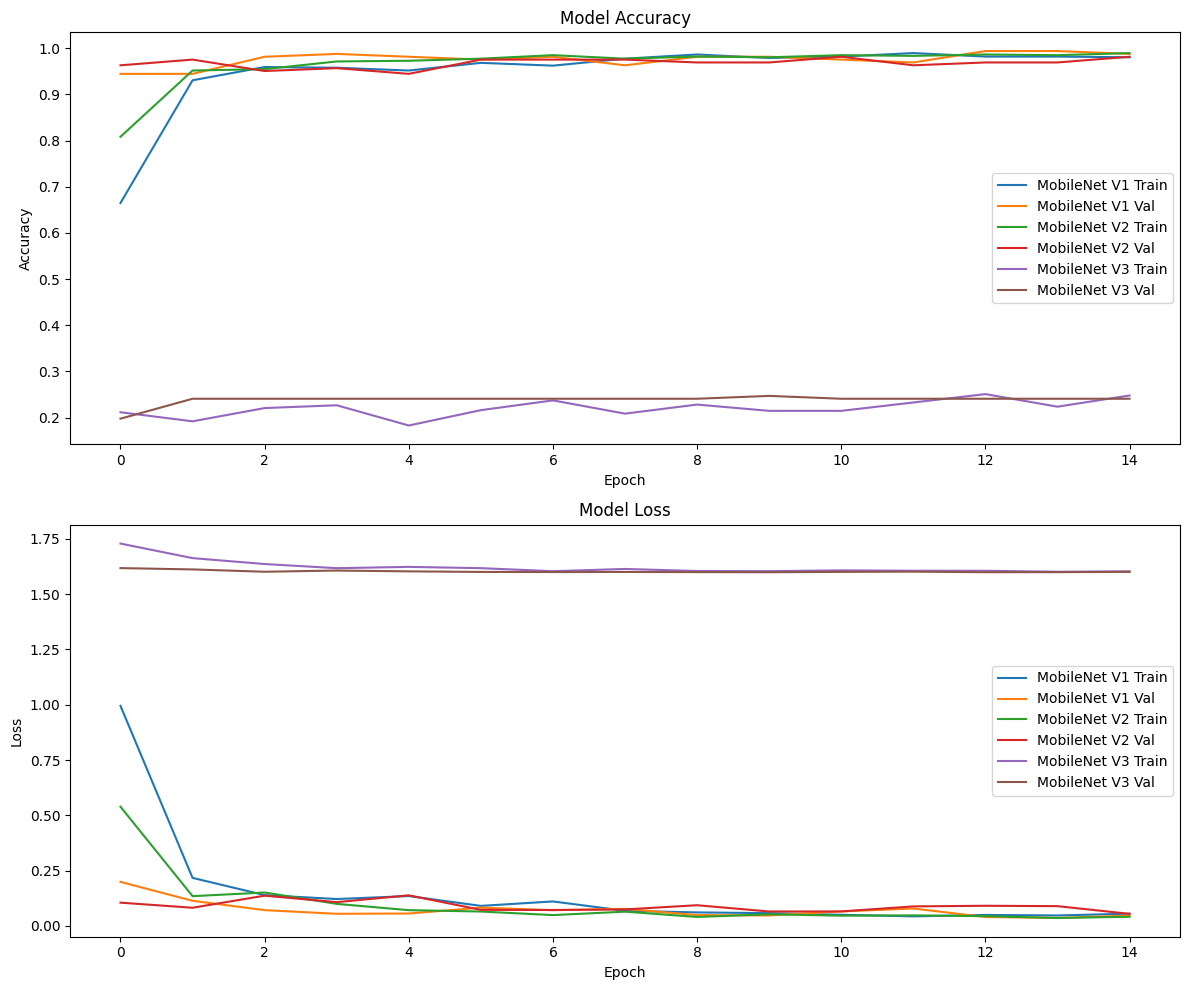


📊 Final Model Comparison:
  Model Version  Test Accuracy  Final Train Accuracy  Final Val Accuracy
0  MobileNet V1       0.995146              0.980363            0.987654
1  MobileNet V2       0.995146              0.989426            0.981481
2  MobileNet V3       0.233010              0.247734            0.240741


In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import pandas as pd

tf.random.set_seed(42)
DATASET_PATH = './dogs_dataset'
TRAIN_PATH = os.path.join(DATASET_PATH, 'train')
TEST_PATH = os.path.join(DATASET_PATH, 'test')

IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 15
NUM_CLASSES = len(os.listdir(TRAIN_PATH))

# Data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    TEST_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# Class labels
class_names = list(train_generator.class_indices.keys())
print(f"Dog breeds: {class_names}")

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
callbacks = [early_stop, reduce_lr]

results = {}

for version in ['v1', 'v2', 'v3']:
    print(f"\n📦 Training MobileNet {version.upper()}...")

    #  model selection
    if version == 'v1':
        base_model = applications.MobileNet(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
    elif version == 'v2':
        base_model = applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
    else:
        base_model = applications.MobileNetV3Large(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

    base_model.trainable = False

    #  model
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(NUM_CLASSES, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train
    history = model.fit(
        train_generator,
        steps_per_epoch=len(train_generator),
        validation_data=validation_generator,
        validation_steps=len(validation_generator),
        epochs=EPOCHS,
        callbacks=callbacks
    )

    # Evaluate
    test_loss, test_acc = model.evaluate(test_generator)
    print(f"✅ Test accuracy: {test_acc:.4f}")

    results[version] = {
        'history': history.history,
        'test_accuracy': test_acc
    }

# Plot training history
plt.figure(figsize=(12, 10))

# Accuracy
plt.subplot(2, 1, 1)
for version in results:
    plt.plot(results[version]['history']['accuracy'], label=f'MobileNet {version.upper()} Train')
    plt.plot(results[version]['history']['val_accuracy'], label=f'MobileNet {version.upper()} Val')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(2, 1, 2)
for version in results:
    plt.plot(results[version]['history']['loss'], label=f'MobileNet {version.upper()} Train')
    plt.plot(results[version]['history']['val_loss'], label=f'MobileNet {version.upper()} Val')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

comparison = pd.DataFrame({
    'Model Version': [f'MobileNet {v.upper()}' for v in results],
    'Test Accuracy': [results[v]['test_accuracy'] for v in results],
    'Final Train Accuracy': [results[v]['history']['accuracy'][-1] for v in results],
    'Final Val Accuracy': [results[v]['history']['val_accuracy'][-1] for v in results]
})

print("\n📊 Final Model Comparison:")
print(comparison)

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, UpSampling2D, Input, concatenate
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
import os
from PIL import Image


In [ ]:
import tensorflow_datasets as tfds

dataset, info = tfds.load('oxford_iiit_pet', with_info=True)


In [15]:
def normalize(input_image, input_mask):
    input_image = tf.cast(input_image, tf.float32) / 255.0
    input_mask = tf.cast(input_mask, tf.uint8)
    input_mask -= 1
    input_mask = tf.where(input_mask == 1, 1, 0)
    return input_image, input_mask

def load_image(datapoint):
    input_image = tf.image.resize(datapoint['image'], (128, 128))
    input_mask = tf.image.resize(datapoint['segmentation_mask'], (128, 128))
    input_image, input_mask = normalize(input_image, input_mask)
    return input_image, input_mask

train = dataset['train'].map(load_image)
test = dataset['test'].map(load_image)

train_dataset = train.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test.batch(32).prefetch(tf.data.AUTOTUNE)


In [16]:
def unet_model(input_size=(128, 128, 3)):
    inputs = Input(input_size)

    # Encoder
    c1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    c1 = Conv2D(64, 3, activation='relu', padding='same')(c1)
    p1 = MaxPooling2D()(c1)

    c2 = Conv2D(128, 3, activation='relu', padding='same')(p1)
    c2 = Conv2D(128, 3, activation='relu', padding='same')(c2)
    p2 = MaxPooling2D()(c2)

    # Bottleneck
    c3 = Conv2D(256, 3, activation='relu', padding='same')(p2)
    c3 = Conv2D(256, 3, activation='relu', padding='same')(c3)

    # Decoder
    u1 = UpSampling2D()(c3)
    u1 = concatenate([u1, c2])
    c4 = Conv2D(128, 3, activation='relu', padding='same')(u1)
    c4 = Conv2D(128, 3, activation='relu', padding='same')(c4)

    u2 = UpSampling2D()(c4)
    u2 = concatenate([u2, c1])
    c5 = Conv2D(64, 3, activation='relu', padding='same')(u2)
    c5 = Conv2D(64, 3, activation='relu', padding='same')(c5)

    outputs = Conv2D(1, 1, activation='sigmoid')(c5)

    model = Model(inputs, outputs)
    return model

model = unet_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [17]:
model.fit(train_dataset, validation_data=test_dataset, epochs=10)

Epoch 1/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 79s 447ms/step - accuracy: 0.6273 - loss: 0.6420 - val_accuracy: 0.6609 - val_loss: 0.6647
Epoch 2/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 44s 325ms/step - accuracy: 0.7457 - loss: 0.5205 - val_accuracy: 0.7944 - val_loss: 0.4507
Epoch 3/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 37s 326ms/step - accuracy: 0.7921 - loss: 0.4541 - val_accuracy: 0.8246 - val_loss: 0.3921
Epoch 4/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 37s 323ms/step - accuracy: 0.8176 - loss: 0.4081 - val_accuracy: 0.8214 - val_loss: 0.4032
Epoch 5/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 41s 326ms/step - accuracy: 0.8308 - loss: 0.3821 - val_accuracy: 0.8494 - val_loss: 0.3481
Epoch 6/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 38s 327ms/step - accuracy: 0.8397 - loss: 0.3651 - val_accuracy: 0.8517 - val_loss: 0.3468
Epoch 7/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 36s 315ms/step - accuracy: 0.8526 - loss: 0.3405 - val_accuracy: 0.8541 - val_loss: 0.3458
Epoch 8/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 42s 327ms/step - accuracy: 0.8567 - loss: 0

In [18]:
def iou_metric(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred > 0.5, tf.float32)
    intersection = tf.reduce_sum(y_true * y_pred)
    union = tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) - intersection
    return intersection / (union + 1e-7)

def dice_coefficient(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred > 0.5, tf.float32)
    intersection = tf.reduce_sum(y_true * y_pred)
    return (2. * intersection) / (tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) + 1e-7)


In [19]:
for images, masks in test_dataset.take(1):
    preds = model.predict(images)
    iou = iou_metric(masks, preds).numpy()
    dice = dice_coefficient(masks, preds).numpy()

print(f"IoU Score: {iou:.4f}")
print(f"Dice Coefficient: {dice:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 627ms/step
IoU Score: 0.8183
Dice Coefficient: 0.9001


In [20]:
import numpy as np
np.Inf = np.inf


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


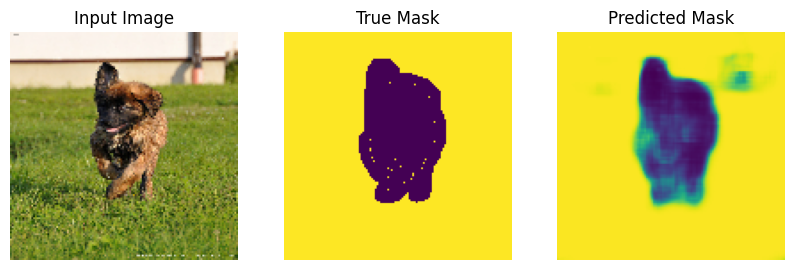

In [21]:
import numpy as np

def display_sample(image, mask, pred_mask):

    if np.any(np.isinf(image)) or np.any(np.isinf(mask)) or np.any(np.isinf(pred_mask)):
        print("Detected np.Inf, replacing with np.inf")

    plt.figure(figsize=(10, 3))
    titles = ["Input Image", "True Mask", "Predicted Mask"]
    images = [image, mask, pred_mask]

    for i in range(3):
        plt.subplot(1, 3, i + 1)
        plt.title(titles[i])
        plt.imshow(tf.keras.utils.array_to_img(images[i]))
        plt.axis('off')
    plt.show()


for image, mask in test_dataset.take(1):
    pred_mask = model.predict(image)
    display_sample(image[0], mask[0], pred_mask[0])
